In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [4]:
# loading dataset

dataset = pd.read_csv('Google_Stock_Price_Train.csv')
train = dataset.iloc[:, 1:2].values
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
train.shape
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
# feature scaling

sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
# creating a data structure with 60(from trial and error) timesteps and 1 output

X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) 
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [8]:
# reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [10]:
# initialize your model
model = Sequential()

In [11]:
# adding lstm and dropout layers

# layer 1
model.add(LSTM(units=50, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# layer 2
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# layer 3
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# layer 4
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [12]:
# adding output layer
model.add(Dense(units=1))

# compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# fitting the RNN
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 80s 67ms/step - loss: 0.0480
Epoch 2/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0082
Epoch 3/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0065
Epoch 4/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 28s 23ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 26s 21ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [============================

In [14]:
# get real stock prices from test set
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = data_test.iloc[:, 1:2].values

In [15]:
real_stock_price.shape

(20, 1)

In [16]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [17]:
# predicting stock prices

total_data = pd.concat((dataset['Open'], data_test['Open']), axis = 0)
inputs = total_data[len(total_data) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [18]:
predicted_stock_price

array([[782.8992 ],
       [779.6583 ],
       [779.4574 ],
       [780.7977 ],
       [784.0787 ],
       [789.76874],
       [794.92163],
       [796.7007 ],
       [796.3655 ],
       [795.6087 ],
       [795.3091 ],
       [795.4205 ],
       [795.7732 ],
       [796.7475 ],
       [798.0042 ],
       [802.6436 ],
       [809.6419 ],
       [817.0333 ],
       [820.8318 ],
       [816.2593 ]], dtype=float32)

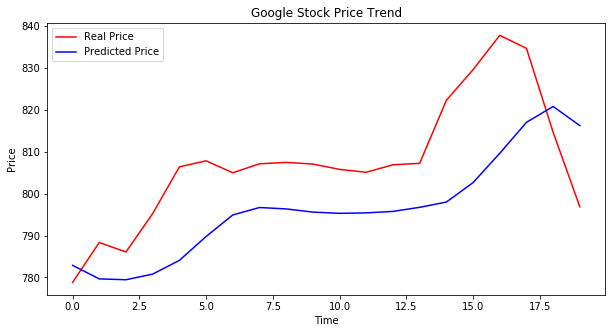

In [19]:
# visualizing stock prices

plt.figure(figsize=(10, 5))
plt.plot(real_stock_price, color='red', label='Real Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Price')
plt.title('Google Stock Price Trend')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()